In [13]:
import pandas as pd
import numpy as np
import re
import string
import itertools
import os.path
import pickle as pkl
import json
from eval import title_bleu
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load titles

In [3]:
titles_df = pd.read_csv('../samples/gptneo/2021/titles.txt', sep='\n\n', header=None)
titles_gen = titles_df[0].str.strip('\"\' ')
titles_len = titles_df[0].str.split().apply(len)

titles_new_df = pd.read_pickle('../data/df_test_recent.pkl')
titles_new = titles_new_df.title

/tmp/ipykernel_907318/644442385.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  titles_df = pd.read_csv('../samples/gptneo/2021/titles.txt', sep='\n\n', header=None)


In [ ]:
# plt.hist(titles_len)
# plt.xlabel('Title num words')
# plt.ylabel('Count')
# plt.show()

# Look for exact matches
For this to be kosher, need to make sure the model never saw any titles within the dates of the test set.

In [9]:
titles_overlap = []
tg = titles_gen.str.lower().str.strip().values
tn = titles_new.str.lower().str.strip().values
print('# generated titles', tg.size, '# GT titles', tn.size)

# generated titles 40 # GT titles 14895


In [11]:
# exact matches
for title_gen in tg:
    if title_gen in tn:
        print(title_gen)
print('# overlaps', len(titles_overlap))

# overlaps 0


Look for closest matches

In [ ]:
bleus = np.zeros((tg.size, tn.size))
for r, title_gen in enumerate(tqdm(tg)):
    for c, title_new in enumerate(tn):
        bleus[r, c] = title_bleu(title_gen, title_new)

In [63]:
# find top matches
matches = np.argmax(bleus, axis=1)
bleu_matches = bleus[np.arange(bleus.shape[0]), matches]
args = np.argsort(bleu_matches)[::-1]

N = 50
for i in range(N):
    print(i)
    print('\t', tg[args[i]])
    print('\t', tn[matches[args[i]]])
    print('\t', bleu_matches[args[i]])

0
	 efficient exploration of deep reinforcement learning policies
	 attacking and defending deep reinforcement learning policies
	 0.41113361690051975
1
	 a distributed neural network for medical image segmentation
	 distributed contrastive learning for medical image segmentation
	 0.3768499164492419
2
	 multi-domain learning for improving the performance and scalability of transfer learning
	 study of the performance and scalability of federated learning for medical imaging with intermittent clients
	 0.2829559628326351
3
	 a distributed machine learning pipeline for machine learning in iot
	 continuous design control for machine learning in certified medical systems
	 0.2626909894424158
4
	 dynamic temporal-difference recurrent neural networks for motion-adaptive driving: a benchmark
	 multi-objective physics-guided recurrent neural networks for identifying non-autonomous dynamical systems
	 0.2626909894424158
5
	 a new benchmark for evaluating neural networks' fairness, precision, a

In [30]:
bleus.shape

(40, 14895)

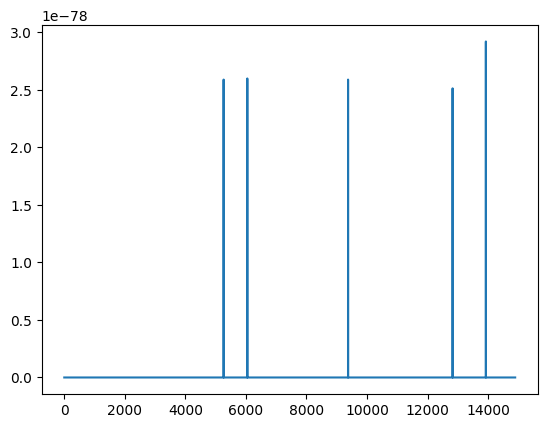

In [31]:
plt.plot(bleus[0])